## Лабораторная работа по курсу \"Искусственный интеллект\"

## Многослойный персептрон

###  Собственная реализация

| Студент | Плешков А.О. |
|---------|--------|
| Группа  | М8О-306Б-19      |

## Настройка среды

Для начала, скачаем датасет MNIST.

In [1]:
#!wget https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/Data/MNIST/mnist.pkl.gz
!curl -o mnist.pkl.gz https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/Data/MNIST/mnist.pkl.gz
!gzip -d mnist.pkl.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 17  9.9M   17 1730k    0     0  3009k      0  0:00:03 --:--:--  0:00:03 3010k
 58  9.9M   58 5906k    0     0  3671k      0  0:00:02  0:00:01  0:00:01 3671k
 66  9.9M   66 6706k    0     0  2600k      0  0:00:03  0:00:02  0:00:01 2601k
 70  9.9M   70 7170k    0     0  2006k      0  0:00:05  0:00:03  0:00:02 2006k
 79  9.9M   79 8034k    0     0  1752k      0  0:00:05  0:00:04  0:00:01 1752k
 88  9.9M   88 8978k    0     0  1609k      0  0:00:06  0:00:05  0:00:01 1448k
100  9.9M  100  9.9M    0     0  1625k      0  0:00:06  0:00:06 --:--:--  915k
"gzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


Затем устанавливаем все необходимые библиотеки: pandas, numpy, pickle, os.

In [2]:
%pip install pandas
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Note: you may need to restart the kernel to use updated packages.


## Подготовка датасетов

Объявляем необходимые функции для анализа датасетов:

In [3]:
def count_of_keys(df):
    unique = np.unique(df)
    counts = np.zeros(len(unique), dtype=np.int32)
    for v in df:
        counts[v] += 1
    return counts
def visualization_of_counts(df):
    counts = count_of_keys(df)
    plt.ylabel("Колисчество элементов в классе")
    plt.xlabel("Номер класса")
    plt.bar(np.arange(len(counts)), counts)
    plt.xticks(np.arange(len(counts)), [i for i in range(len(counts))])
def analyze(labels, features, string :str):
    visualization_of_counts(labels)
    print("Данные для [{}]".format(string))
    print("Количество элементов в датасете: {}".format(len(labels)))
    print("Количество атрибутов в элементе: {}".format(len(features[0])))
    print("Минимальное значение атрибута  : {}".format(np.min(features)))
    print("Максимальное значение атрибута : {}".format(np.max(features)))
    print()

### MNIST

Датасет MNIST содержит картинки, на которых изображены цифры. 

In [4]:
with open('mnist.pkl', 'rb') as mnist_pickle:
    MNIST = pickle.load(mnist_pickle)
print(MNIST.keys())

dict_keys(['Train'])


In [5]:
print(MNIST['Train'].keys())

dict_keys(['Labels', 'Features'])


Данные для [MNIST]
Количество элементов в датасете: 42000
Количество атрибутов в элементе: 784
Минимальное значение атрибута  : 0
Максимальное значение атрибута : 255

Данные для [Обучающая выборка из MNIST]
Количество элементов в датасете: 33600
Количество атрибутов в элементе: 784
Минимальное значение атрибута  : 0.0
Максимальное значение атрибута : 1.0

Данные для [Тестировочная выборка из MNIST]
Количество элементов в датасете: 8400
Количество атрибутов в элементе: 784
Минимальное значение атрибута  : 0.0
Максимальное значение атрибута : 1.0



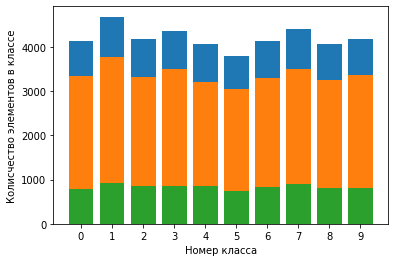

In [6]:
def conv_df(df):
    return np.array(df).astype(np.float32)/255

analyze(MNIST['Train']['Labels'], MNIST['Train']['Features'], "MNIST")

features = conv_df(MNIST['Train']['Features'])
labels = MNIST['Train']['Labels']

mnist_train_x, mnist_test_x, mnist_train_y, mnist_test_y = train_test_split(features,labels,test_size=0.2)

analyze(mnist_train_y, mnist_train_x, "Обучающая выборка из MNIST")
analyze(mnist_test_y, mnist_test_x, "Тестировочная выборка из MNIST")

Мы уже подготовили датасет для тестирования, а теперь приведем его основные размеры:

In [7]:
print("Размер обучающей выборки: {}".format(len(mnist_train_x)))
print("Размер тестовой выборки : {}".format(len(mnist_test_x)))
print("Размер датасета MNIST   : {}".format(len(features)))

Размер обучающей выборки: 33600
Размер тестовой выборки : 8400
Размер датасета MNIST   : 42000


### FashionMNIST

In [8]:
%cd fashion-mnist/utils
import mnist_reader
%cd ..
fashion_mnist_train_x_raw, fashion_mnist_train_y = mnist_reader.load_mnist('data/fashion', kind='train')
fashion_mnist_test_x_raw, fashion_mnist_test_y = mnist_reader.load_mnist('data/fashion', kind='t10k')
%cd ..

C:\VScode\fashion-mnist\utils
C:\VScode\fashion-mnist
C:\VScode


Данные для [Обучающая выборка из FashionMNIST]
Количество элементов в датасете: 60000
Количество атрибутов в элементе: 784
Минимальное значение атрибута  : 0
Максимальное значение атрибута : 255

Данные для [Тестировочная выборка из FashionMNIST]
Количество элементов в датасете: 10000
Количество атрибутов в элементе: 784
Минимальное значение атрибута  : 0
Максимальное значение атрибута : 255



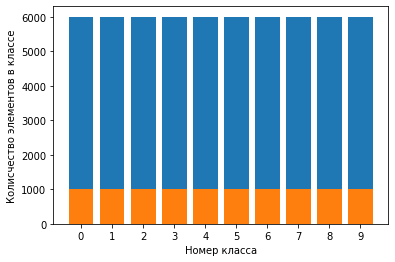

In [9]:
analyze(fashion_mnist_train_y, fashion_mnist_train_x_raw, "Обучающая выборка из FashionMNIST")
analyze(fashion_mnist_test_y, fashion_mnist_test_x_raw, "Тестировочная выборка из FashionMNIST")

Так как каждое значение картинки от 0 до 255, переведем данные значения в числа с плавающей точкой от 0 до 1.

In [10]:
fashion_mnist_train_x = conv_df(fashion_mnist_train_x_raw)
fashion_mnist_test_x  = conv_df(fashion_mnist_test_x_raw)

In [11]:
print(fashion_mnist_train_x[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00392157 0.         0.         0.05098039 0.28627452 

In [12]:
print("Размерр датасета FashionMNIST: {}".format(len(fashion_mnist_test_x) + len(fashion_mnist_train_x)))

Размерр датасета FashionMNIST: 70000


## Нейронная сеть

### Основные компоненты сети

Так как нейронную сеть можно представить в виде последовательности объектов, которые осуществляют взаимодействие межу собой, будем формировать нейросеть из объектов с методами forward и backward. Методы forward будут использоваться для получения результатов от нейросети, то есть будет осуществляться прямая прогонка, а методы backward - для осуществления обратного прохода, который будет использоваться для обучения сети.

Базовую нейросеть можно представить в виде последовательности классов, приведенных ниже:

In [13]:
class Softmax:
    def forward(self,z):
        self.z = z
        zmax = z.max(axis=1,keepdims=True)
        expz = np.exp(z-zmax)
        Z = expz.sum(axis=1,keepdims=True)
        return expz / Z
    def backward(self,dp):
        p = self.forward(self.z)
        pdp = p * dp
        return pdp - p * pdp.sum(axis=1, keepdims=True)
    
class CrossEntropyLoss:
    def forward(self,p,y):
        self.p = p
        self.y = y
        p_of_y = p[np.arange(len(y)), y]
        log_prob = np.log(p_of_y)
        return -log_prob.mean()
    def backward(self,loss):
        dlog_softmax = np.zeros_like(self.p)
        dlog_softmax[np.arange(len(self.y)), self.y] -= 1.0/len(self.y)
        return dlog_softmax / self.p
    
class Linear:
    def __init__(self,nin,nout):
        self.W = np.random.normal(0, 1.0/np.sqrt(nin), (nout, nin))
        self.b = np.zeros((1,nout))
        self.dW = np.zeros_like(self.W)
        self.db = np.zeros_like(self.b)
        
    def forward(self, x):
        self.x=x
        return np.dot(x, self.W.T) + self.b
    
    def backward(self, dz):
        dx = np.dot(dz, self.W)
        dW = np.dot(dz.T, self.x)
        db = dz.sum(axis=0)
        self.dW = dW
        self.db = db
        return dx
    
    def update(self,lr):
        self.W -= lr*self.dW
        self.b -= lr*self.db

class Net:
    def __init__(self):
        self.layers = []
    
    def add(self,l):
        self.layers.append(l)
        
    def forward(self,x):
        for l in self.layers:
            x = l.forward(x)
        return x
    
    def backward(self,z):
        for l in self.layers[::-1]:
            z = l.backward(z)
        return z
    
    def update(self,lr):
        for l in self.layers:
            if 'update' in l.__dir__():
                l.update(lr)
                
class Tanh:
    def forward(self,x):
        y = np.tanh(x)
        self.y = y
        return y
    def backward(self,dy):
        return (1.0-self.y**2)*dy
    def copy(self):
        return Tanh()

Реализуем простую обертку над этими классами, при помощи которой можно будет реализовать многослойный перцептрон, задав всего несколько параметров. Данный класс будет иметь зависимости от класса Net, а саму сеть можно представить следующим образом:

\[Слой нейросети\] <-> \[Функция активации\] <->  ... <-> \[Функция активации\] <-> \[SoftMax\] <-> \[Функция ошибки\] 

### Класс Perceptron

Класс Perceptron имеет множество аргументов, которые могут быть отрегулированы программистом. Кроме того, программист может передать базовый Python список, в котором будут находится широты внутренних слоев нейросети. Таким образом, при помощи одного списка задается количество скрытых слоев и их конфигурация.

Процесс обучения вынесен в отдельную функцию fit. Кроме того, пользователь может просто предоставить данные нейросети и сам класс вычислит количество входных и выходных нейронов.

Таким образом, чтобы создать нейросеть при помощи этого фреймворка, достаточно задать широты внутренних нейронов и передать данные для обучения нейросети.

In [14]:
class Perceptron:
    def __init__(self, learning_rate=0.1,epochs=10, soft=Softmax(),act_func=Tanh(),
                layers=[5], loss_func=CrossEntropyLoss(),show_status=False):
        self.learning_rate=learning_rate
        self.epochs=epochs
        self.softmax=soft
        self.act_func=act_func
        self.layers=layers
        self.loss_function=loss_func
        self.show_status=show_status
        self.level=0
     
    def status_print(self, msg, level=-1):
        if level == -1:
            level = self.level
        print("  "*level + msg)
    def create_net(self, X, Y):
        self.net = Net()
        # Узнаем ширину слоев нейросети
        layers_settings = self.layers.copy()
        layers_settings.insert(0, len(X[0]))
        layers_settings.append(len(np.unique(Y)))
        self.classes_count = layers_settings[-1]
        if self.show_status:
            self.status_print("Создание сети:")
            self.level += 1
            self.status_print("Количество скрытых слоев    : {}".format(len(layers_settings)-2))
            self.status_print("Количество входных нейронов : {}".format(layers_settings[0]))
            self.status_print("Koличество выходных нейронов: {}".format(layers_settings[-1]))
            self.status_print("Ширина скрытых слоев        : {}".format(self.layers))
            self.level -= 1
            
        # Конфигурация нейросети слоями
        for i in range(len(layers_settings)-2):
            self.net.add(Linear(layers_settings[i], layers_settings[i+1]))
            self.net.add(self.act_func.copy())
        # Добавляем выходной слой и softmax
        self.net.add(Linear(layers_settings[-2], layers_settings[-1]))
        self.net.add(self.softmax)
        return self    
    
    # Надо обучить персептрон
    def fit(self, X,Y):
        # Создадим нейросеть
        self.create_net(X,Y)
        # Процесс обучения
        if self.show_status:
            self.level = 0
            self.status_print("Обучение сети:")
            self.level += 1
            
        for epoch in range(1, self.epochs + 1):
            self.train_epoch(X, Y)
            if self.show_status:
                self.status_print("[Эпоха {} из {}] Потеря: {}, Точность: {}".format(epoch, self.epochs, *(self.score(X,Y))))
        return self

    def train_epoch(self, train_x, train_y, batch_size=4):
        net = self.net
        loss = self.loss_function
        lr = self.learning_rate
        for i in range(0,len(train_x),batch_size):
            xb = train_x[i:i+batch_size]
            yb = train_y[i:i+batch_size]

            p = net.forward(xb)
            l = loss.forward(p,yb)
            dp = loss.backward(l)
            dx = net.backward(dp)
            net.update(lr)  

    # Вычисление вроятнсотей принадлжения каждому возможному классу
    def predict_prob(self, X):
        return self.net.forward(X)
    
    # Выдаем номер наиболее вероятного класса
    def predict(self, X):
        return np.argmax(self.predict_prob(X))
    
    def score(self, X,Y, calculate_confusion_matrix=False):
        p = self.net.forward(X)
        l = self.loss_function.forward(p,Y)
        pred = np.argmax(p,axis=1)
        acc = (pred==Y).mean()
        confusion_matrix=[]
        if calculate_confusion_matrix:
            confusion_matrix = np.zeros((self.classes_count, self.classes_count), dtype=np.int32)
            for prd, act in zip (pred, Y):
                confusion_matrix[prd][act] += 1
        return l,acc, confusion_matrix

## Тестирование

### Теститрование на датасете MNIST

Для начала покажем, что представляет из себя выборка MNIST:

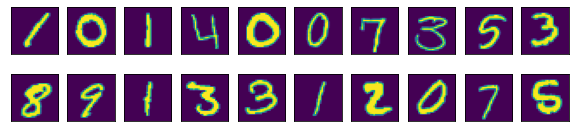

In [15]:
plt.figure(figsize=(10,6))
for i in range(20):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(features[i].reshape(28,28))
plt.show()

#### Однослойный перcептрон #### 

In [16]:
one_layer_perceptron = Perceptron(show_status=True, layers=[])
one_layer_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность: {}".format(one_layer_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети:
  Количество скрытых слоев    : 0
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Ширина скрытых слоев        : []
Обучение сети:
  [Эпоха 1 из 10] Потеря: 0.36012798197117596, Точность: 0.8971130952380952
  [Эпоха 2 из 10] Потеря: 0.33842502850957396, Точность: 0.90375
  [Эпоха 3 из 10] Потеря: 0.32857397258953835, Точность: 0.9065178571428572
  [Эпоха 4 из 10] Потеря: 0.32327896856117605, Точность: 0.907797619047619
  [Эпоха 5 из 10] Потеря: 0.3198480305740935, Точность: 0.9083928571428571
  [Эпоха 6 из 10] Потеря: 0.3171828001210917, Точность: 0.9090178571428571
  [Эпоха 7 из 10] Потеря: 0.31484590757599284, Точность: 0.9095833333333333
  [Эпоха 8 из 10] Потеря: 0.31269093184398894, Точность: 0.9099702380952381
  [Эпоха 9 из 10] Потеря: 0.3107023438916968, Точность: 0.9101785714285714
  [Эпоха 10 из 10] Потеря: 0.308912204868676, Точность: 0.910625
Точность: 0.8961904761904762


#### Двуслойные перcептроны #### 

5 нейронов на скрытом слое:

In [17]:
first_two_layer_perceptron = Perceptron(show_status=True, layers=[5])
first_two_layer_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность: {}".format(first_two_layer_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети:
  Количество скрытых слоев    : 1
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Ширина скрытых слоев        : [5]
Обучение сети:
  [Эпоха 1 из 10] Потеря: 0.6718751028293143, Точность: 0.8054166666666667
  [Эпоха 2 из 10] Потеря: 0.5627640292720025, Точность: 0.8439880952380953
  [Эпоха 3 из 10] Потеря: 0.5767373649383346, Точность: 0.841875
  [Эпоха 4 из 10] Потеря: 0.5356954113627382, Точность: 0.8571428571428571
  [Эпоха 5 из 10] Потеря: 0.5333052659024963, Точность: 0.8556845238095238
  [Эпоха 6 из 10] Потеря: 0.5125635607725675, Точность: 0.8648809523809524
  [Эпоха 7 из 10] Потеря: 0.5140349369653384, Точность: 0.8656547619047619
  [Эпоха 8 из 10] Потеря: 0.5027537369891694, Точность: 0.8674107142857143
  [Эпоха 9 из 10] Потеря: 0.5237473780632024, Точность: 0.85875
  [Эпоха 10 из 10] Потеря: 0.5135009588710777, Точность: 0.8664285714285714
Точность: 0.8572619047619048


10 нейронов на скрытом слое:

In [18]:
second_two_layer_perceptron = Perceptron(show_status=True, layers=[10])
second_two_layer_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность: {}".format(second_two_layer_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети:
  Количество скрытых слоев    : 1
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Ширина скрытых слоев        : [10]
Обучение сети:
  [Эпоха 1 из 10] Потеря: 0.400780298713012, Точность: 0.877529761904762
  [Эпоха 2 из 10] Потеря: 0.3436039462431134, Точность: 0.895327380952381
  [Эпоха 3 из 10] Потеря: 0.3326609552883732, Точность: 0.900952380952381
  [Эпоха 4 из 10] Потеря: 0.31768957457423475, Точность: 0.9079464285714286
  [Эпоха 5 из 10] Потеря: 0.3042219595996926, Точность: 0.9111607142857143
  [Эпоха 6 из 10] Потеря: 0.31581605189913187, Точность: 0.9039583333333333
  [Эпоха 7 из 10] Потеря: 0.288800438721543, Точность: 0.9161607142857143
  [Эпоха 8 из 10] Потеря: 0.2645319331693046, Точность: 0.9222619047619047
  [Эпоха 9 из 10] Потеря: 0.2821644149850222, Точность: 0.9188392857142857
  [Эпоха 10 из 10] Потеря: 0.319124406251396, Точность: 0.90625
Точность: 0.8902380952380953


25 нейронов на скрытом слое:

In [19]:
third_two_layer_perceptron = Perceptron(show_status=True, layers=[25])
third_two_layer_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность: {}".format(third_two_layer_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети:
  Количество скрытых слоев    : 1
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Ширина скрытых слоев        : [25]
Обучение сети:
  [Эпоха 1 из 10] Потеря: 0.21975008173507166, Точность: 0.9338690476190477
  [Эпоха 2 из 10] Потеря: 0.22788223478976338, Точность: 0.9296428571428571
  [Эпоха 3 из 10] Потеря: 0.18424370913290197, Точность: 0.9432142857142857
  [Эпоха 4 из 10] Потеря: 0.18335662041638343, Точность: 0.9432738095238096
  [Эпоха 5 из 10] Потеря: 0.16983602800100084, Точность: 0.9469345238095238
  [Эпоха 6 из 10] Потеря: 0.1473234415426514, Точность: 0.9550595238095239
  [Эпоха 7 из 10] Потеря: 0.145641220653166, Точность: 0.9561904761904761
  [Эпоха 8 из 10] Потеря: 0.14005232266151513, Точность: 0.9567857142857142
  [Эпоха 9 из 10] Потеря: 0.1339373106256264, Точность: 0.9571726190476191
  [Эпоха 10 из 10] Потеря: 0.12115558192354414, Точность: 0.9617857142857142
Точность: 0.9375


100 нейронов на скрытом слое:

In [20]:
fourth_two_layer_perceptron = Perceptron(show_status=True, layers=[100])
fourth_two_layer_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность: {}".format(fourth_two_layer_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети:
  Количество скрытых слоев    : 1
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Ширина скрытых слоев        : [100]
Обучение сети:
  [Эпоха 1 из 10] Потеря: 0.16088438601127766, Точность: 0.9505357142857143
  [Эпоха 2 из 10] Потеря: 0.15772185926978297, Точность: 0.9489285714285715
  [Эпоха 3 из 10] Потеря: 0.13782159055952276, Точность: 0.9540178571428571
  [Эпоха 4 из 10] Потеря: 0.07653512277006239, Точность: 0.974672619047619
  [Эпоха 5 из 10] Потеря: 0.08416631162488859, Точность: 0.9724404761904762
  [Эпоха 6 из 10] Потеря: 0.07966709743266025, Точность: 0.9738095238095238
  [Эпоха 7 из 10] Потеря: 0.04302401025632936, Точность: 0.9860119047619048
  [Эпоха 8 из 10] Потеря: 0.039665540225390684, Точность: 0.9861904761904762
  [Эпоха 9 из 10] Потеря: 0.040282420977707886, Точность: 0.9859523809523809
  [Эпоха 10 из 10] Потеря: 0.031098048570045795, Точность: 0.9892261904761904
Точность: 0.9629761904761904


#### Трехслойные перcептроны #### 

Внутренние слои шириной 4 и 15:

In [21]:
first_three_layer_perceptron = Perceptron(show_status=True, layers=[4, 15])
first_three_layer_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность: {}".format(first_three_layer_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети:
  Количество скрытых слоев    : 2
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Ширина скрытых слоев        : [4, 15]
Обучение сети:
  [Эпоха 1 из 10] Потеря: 0.8883114161186243, Точность: 0.71875
  [Эпоха 2 из 10] Потеря: 0.7527937957358095, Точность: 0.7774702380952381
  [Эпоха 3 из 10] Потеря: 0.7503707703887177, Точность: 0.7693452380952381
  [Эпоха 4 из 10] Потеря: 0.7381614861543881, Точность: 0.7720833333333333
  [Эпоха 5 из 10] Потеря: 0.7172333617765628, Точность: 0.7869642857142857
  [Эпоха 6 из 10] Потеря: 0.7113576822466078, Точность: 0.7804166666666666
  [Эпоха 7 из 10] Потеря: 0.7000725061810731, Точность: 0.7916071428571428
  [Эпоха 8 из 10] Потеря: 0.6994759546881509, Точность: 0.7874404761904762
  [Эпоха 9 из 10] Потеря: 0.6813539727738107, Точность: 0.8075297619047619
  [Эпоха 10 из 10] Потеря: 0.6976775483667006, Точность: 0.7903869047619048
Точность: 0.7728571428571429


Внутренние слои шириной 7 и 10:

In [22]:
second_three_layer_perceptron = Perceptron(show_status=True, layers=[7,10])
second_three_layer_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность: {}".format(second_three_layer_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети:
  Количество скрытых слоев    : 2
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Ширина скрытых слоев        : [7, 10]
Обучение сети:
  [Эпоха 1 из 10] Потеря: 0.5017453500465694, Точность: 0.8558928571428571
  [Эпоха 2 из 10] Потеря: 0.47549271275938365, Точность: 0.8642857142857143
  [Эпоха 3 из 10] Потеря: 0.47340124844134046, Точность: 0.8657440476190477
  [Эпоха 4 из 10] Потеря: 0.48266307447678325, Точность: 0.8585714285714285
  [Эпоха 5 из 10] Потеря: 0.44190687208659923, Точность: 0.8711309523809524
  [Эпоха 6 из 10] Потеря: 0.44433484364437514, Точность: 0.872470238095238
  [Эпоха 7 из 10] Потеря: 0.4495183208123325, Точность: 0.871875
  [Эпоха 8 из 10] Потеря: 0.43419938026248317, Точность: 0.8753869047619047
  [Эпоха 9 из 10] Потеря: 0.45507194238602255, Точность: 0.8775
  [Эпоха 10 из 10] Потеря: 0.4313702921171947, Точность: 0.875297619047619
Точность: 0.8607142857142858


Внутренние слои шириной 20 и 10:

In [23]:
third_three_layer_perceptron = Perceptron(show_status=True, layers=[20,10])
third_three_layer_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность: {}".format(third_three_layer_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети:
  Количество скрытых слоев    : 2
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Ширина скрытых слоев        : [20, 10]
Обучение сети:
  [Эпоха 1 из 10] Потеря: 0.38376374334108243, Точность: 0.8722321428571429
  [Эпоха 2 из 10] Потеря: 0.29754362329467354, Точность: 0.9122916666666666
  [Эпоха 3 из 10] Потеря: 0.28979757133394235, Точность: 0.9169642857142857
  [Эпоха 4 из 10] Потеря: 0.3125805766474302, Точность: 0.906547619047619
  [Эпоха 5 из 10] Потеря: 0.27324474411700644, Точность: 0.9219047619047619
  [Эпоха 6 из 10] Потеря: 0.2862698924379386, Точность: 0.9155952380952381
  [Эпоха 7 из 10] Потеря: 0.23672461713581605, Точность: 0.9316666666666666
  [Эпоха 8 из 10] Потеря: 0.23734687847343602, Точность: 0.9308630952380952
  [Эпоха 9 из 10] Потеря: 0.23018685018185342, Точность: 0.934375
  [Эпоха 10 из 10] Потеря: 0.23478909682995636, Точность: 0.9342857142857143
Точность: 0.9220238095238096


#### Другие многослойные перцептроны

Внутренние слои шириной 15, 7, 12:

In [24]:
first_multi_layer_perceptron = Perceptron(show_status=True, layers=[15, 7, 12])
first_multi_layer_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность: {}".format(first_multi_layer_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети:
  Количество скрытых слоев    : 3
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Ширина скрытых слоев        : [15, 7, 12]
Обучение сети:
  [Эпоха 1 из 10] Потеря: 0.47008318051439685, Точность: 0.8613095238095239
  [Эпоха 2 из 10] Потеря: 0.4264550117989591, Точность: 0.8793154761904762
  [Эпоха 3 из 10] Потеря: 0.4345682684163545, Точность: 0.8707738095238096
  [Эпоха 4 из 10] Потеря: 0.47840470158000037, Точность: 0.8695833333333334
  [Эпоха 5 из 10] Потеря: 0.403977555524636, Точность: 0.8883333333333333
  [Эпоха 6 из 10] Потеря: 0.4419749648432358, Точность: 0.8777678571428571
  [Эпоха 7 из 10] Потеря: 0.3939502963066876, Точность: 0.8914285714285715
  [Эпоха 8 из 10] Потеря: 0.43226128472848074, Точность: 0.8757440476190477
  [Эпоха 9 из 10] Потеря: 0.4059837278976128, Точность: 0.8829464285714286
  [Эпоха 10 из 10] Потеря: 0.4249823213952793, Точность: 0.877827380952381
Точность: 0.8741666666666666


Внутренние слои шириной 4, 7, 5, 7:

In [25]:
second_multi_layer_perceptron = Perceptron(show_status=True, layers=[4, 7, 5, 7])
second_multi_layer_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность: {}".format(second_multi_layer_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети:
  Количество скрытых слоев    : 4
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Ширина скрытых слоев        : [4, 7, 5, 7]
Обучение сети:
  [Эпоха 1 из 10] Потеря: 0.9463719130637327, Точность: 0.6810416666666667
  [Эпоха 2 из 10] Потеря: 0.9149760849318672, Точность: 0.6777678571428571
  [Эпоха 3 из 10] Потеря: 0.8591233210725684, Точность: 0.6982440476190476
  [Эпоха 4 из 10] Потеря: 0.8990646370811832, Точность: 0.6866369047619048
  [Эпоха 5 из 10] Потеря: 0.8555684232043383, Точность: 0.7099702380952381
  [Эпоха 6 из 10] Потеря: 0.8592187525168653, Точность: 0.7054761904761905
  [Эпоха 7 из 10] Потеря: 0.8682747977000433, Точность: 0.6964880952380952
  [Эпоха 8 из 10] Потеря: 0.8826000566416343, Точность: 0.7050892857142858
  [Эпоха 9 из 10] Потеря: 0.8765131021778952, Точность: 0.6946130952380952
  [Эпоха 10 из 10] Потеря: 0.8749256305432197, Точность: 0.682797619047619
Точность: 0.6760714285714285


Внутренние слои шириной 3, 5, 4, 7, 2, 5, 1, 2, 3:

In [26]:
third_multi_layer_perceptron = Perceptron(show_status=True, layers=[3, 5, 4, 7, 2, 5, 1, 2, 3])
third_multi_layer_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность: {}".format(third_multi_layer_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети:
  Количество скрытых слоев    : 9
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Ширина скрытых слоев        : [3, 5, 4, 7, 2, 5, 1, 2, 3]
Обучение сети:
  [Эпоха 1 из 10] Потеря: 1.7784081411675179, Точность: 0.25607142857142856
  [Эпоха 2 из 10] Потеря: 2.360084187256431, Точность: 0.1006547619047619
  [Эпоха 3 из 10] Потеря: 2.322346601115773, Точность: 0.1006547619047619
  [Эпоха 4 из 10] Потеря: 2.270938859563341, Точность: 0.12333333333333334
  [Эпоха 5 из 10] Потеря: 2.268849211028967, Точность: 0.12345238095238095
  [Эпоха 6 из 10] Потеря: 2.0857669101256646, Точность: 0.2011011904761905
  [Эпоха 7 из 10] Потеря: 2.084390415943156, Точность: 0.201875
  [Эпоха 8 из 10] Потеря: 2.083399645957849, Точность: 0.20285714285714285
  [Эпоха 9 из 10] Потеря: 2.1027978311433584, Точность: 0.2001190476190476
  [Эпоха 10 из 10] Потеря: 2.099702147479694, Точность: 0.20086309523809523
Точность: 0.19476190476190477


Как видно из результатов тестирования подобранные гиперпараметры сети немного не подходят для решения данной задачи. 

### Тестирование на датасете FashionMnist

Для начала покажем, что представляет из себя выборка FashionMnist:

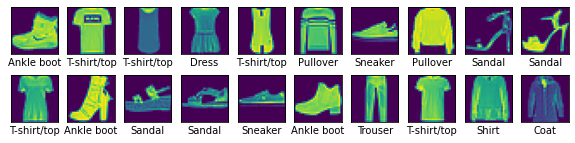

In [27]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               
plt.figure(figsize=(10,6))
for i in range(20):
    plt.subplot(5,10,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(fashion_mnist_train_x_raw[i].reshape(28,28))
    plt.xlabel(class_names[fashion_mnist_train_y[i]])
plt.show()

#### Однослойный персептрон

In [28]:
fmnist_one_layer_perceptron = Perceptron(show_status=True, layers=[])
fmnist_one_layer_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность: {}".format(fmnist_one_layer_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)[1]))

Создание сети:
  Количество скрытых слоев    : 0
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Ширина скрытых слоев        : []
Обучение сети:
  [Эпоха 1 из 10] Потеря: 0.9362294840191662, Точность: 0.7936833333333333
  [Эпоха 2 из 10] Потеря: 0.9163459961381697, Точность: 0.8047333333333333
  [Эпоха 3 из 10] Потеря: 0.8879618385056495, Точность: 0.8109833333333333
  [Эпоха 4 из 10] Потеря: 0.8985028615382554, Точность: 0.8106333333333333
  [Эпоха 5 из 10] Потеря: 0.8592881162727871, Точность: 0.81555
  [Эпоха 6 из 10] Потеря: 0.8215496062479246, Точность: 0.8212666666666667
  [Эпоха 7 из 10] Потеря: 0.7803826013756447, Точность: 0.82735
  [Эпоха 8 из 10] Потеря: 0.7598716878241835, Точность: 0.83105
  [Эпоха 9 из 10] Потеря: 0.7278574377939396, Точность: 0.8365333333333334
  [Эпоха 10 из 10] Потеря: 0.7603263712853486, Точность: 0.8322166666666667
Точность: 0.8057


#### Двуслойный персептрон

13 нейронов на скрытом слое:

In [29]:
fmnist_two_layer_perceptron = Perceptron(show_status=True, layers=[13], learning_rate=0.01)
fmnist_two_layer_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность: {}".format(fmnist_two_layer_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)[1]))

Создание сети:
  Количество скрытых слоев    : 1
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Ширина скрытых слоев        : [13]
Обучение сети:
  [Эпоха 1 из 10] Потеря: 0.45175089958818826, Точность: 0.8433
  [Эпоха 2 из 10] Потеря: 0.4127216520526387, Точность: 0.8541833333333333
  [Эпоха 3 из 10] Потеря: 0.3956320400221304, Точность: 0.8590333333333333
  [Эпоха 4 из 10] Потеря: 0.38664981025190215, Точность: 0.8619
  [Эпоха 5 из 10] Потеря: 0.38039699545621564, Точность: 0.8641666666666666
  [Эпоха 6 из 10] Потеря: 0.37684257974276764, Точность: 0.8653333333333333
  [Эпоха 7 из 10] Потеря: 0.3655780583002168, Точность: 0.8691833333333333
  [Эпоха 8 из 10] Потеря: 0.35212707340150756, Точность: 0.8727333333333334
  [Эпоха 9 из 10] Потеря: 0.3449137579201802, Точность: 0.8749166666666667
  [Эпоха 10 из 10] Потеря: 0.34006455910009936, Точность: 0.87615
Точность: 0.8515


#### Трехслойный персептрон

Внутренние слои шириной 10 и 15:

In [30]:
fmnist_three_layer_perceptron = Perceptron(show_status=True, layers=[10,15], learning_rate=0.001, epochs=20)
fmnist_three_layer_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность: {}".format(fmnist_three_layer_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)[1]))

Создание сети:
  Количество скрытых слоев    : 2
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Ширина скрытых слоев        : [10, 15]
Обучение сети:
  [Эпоха 1 из 20] Потеря: 0.7955294202067639, Точность: 0.7234166666666667
  [Эпоха 2 из 20] Потеря: 0.6239079212965696, Точность: 0.7820833333333334
  [Эпоха 3 из 20] Потеря: 0.5369677127228679, Точность: 0.8183833333333334
  [Эпоха 4 из 20] Потеря: 0.49049987766131997, Точность: 0.83445
  [Эпоха 5 из 20] Потеря: 0.4624533847353969, Точность: 0.8423
  [Эпоха 6 из 20] Потеря: 0.4436332984848438, Точность: 0.8479
  [Эпоха 7 из 20] Потеря: 0.4299713161710897, Точность: 0.8523666666666667
  [Эпоха 8 из 20] Потеря: 0.4195278862745677, Точность: 0.8558833333333333
  [Эпоха 9 из 20] Потеря: 0.41127664219970794, Точность: 0.8583
  [Эпоха 10 из 20] Потеря: 0.4045440371795299, Точность: 0.8609833333333333
  [Эпоха 11 из 20] Потеря: 0.39886673008094164, Точность: 0.8626166666666667
  [Эпоха 12 из 20] Потеря: 0.393962777615

#### Четырехслойный персептрон

Внутренние слои шириной 15, 7 и 12:

In [31]:
fmnist_four_layer_perceptron = Perceptron(show_status=True, layers=[15, 7, 12], learning_rate=0.001, epochs=20)
fmnist_four_layer_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность: {}".format(fmnist_four_layer_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)[1]))

Создание сети:
  Количество скрытых слоев    : 3
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Ширина скрытых слоев        : [15, 7, 12]
Обучение сети:
  [Эпоха 1 из 20] Потеря: 0.8390944744145726, Точность: 0.7586
  [Эпоха 2 из 20] Потеря: 0.6220291423820967, Точность: 0.7926333333333333
  [Эпоха 3 из 20] Потеря: 0.5451680852000625, Точность: 0.8081333333333334
  [Эпоха 4 из 20] Потеря: 0.502688944308888, Точность: 0.8234166666666667
  [Эпоха 5 из 20] Потеря: 0.47154144971261763, Точность: 0.8390333333333333
  [Эпоха 6 из 20] Потеря: 0.4469898403017877, Точность: 0.8484166666666667
  [Эпоха 7 из 20] Потеря: 0.4272610081471165, Точность: 0.8554166666666667
  [Эпоха 8 из 20] Потеря: 0.4112393453960867, Точность: 0.8604166666666667
  [Эпоха 9 из 20] Потеря: 0.39830508454254654, Точность: 0.8644333333333334
  [Эпоха 10 из 20] Потеря: 0.3878149028190392, Точность: 0.86795
  [Эпоха 11 из 20] Потеря: 0.3790723253980481, Точность: 0.8702833333333333
  [Эпоха 12 из 2

### Итоги

Приведем таблицы со статистикой тестирования

|№ | Кол-во внутр-х слоев | Широты внутр-х слоев | Точность на тестовой выборке (%) | Кол-во эпох | Коэф. обучения | Датасет | 
|--|:--------------------:|:------------:|:--------------------------------:|:-----------:|:-----------:|:-----------:|
|1| 0 |  | 89.61904761904762 | 10 | 0.1 | MNIST |
|2| 1 | 5  | 85.72619047619048 | 10 | 0.1  | MNIST |
|3| 1 | 10 | 89.02380952380953 | 10 | 0.1  | MNIST |
|4| 1 | 25 | 93.75 | 10 | 0.1  | MNIST |
|5| 1 | 100 | 96.29761904761904 | 10 | 0.1  | MNIST |
|6| 2 | 4, 15 | 77.28571428571429 | 10 | 0.1  | MNIST |
|7| 2 | 7, 10 | 86.07142857142858 | 10 | 0.1  | MNIST |
|8| 2 | 20, 10 | 92.20238095238096 | 10 | 0.1  | MNIST |
|9| 3 | 15, 7, 12 | 87.41666666666666 | 10 | 0.1  | MNIST |
|10| 4 | 4, 7, 5, 7 | 67.60714285714285 | 10 | 0.1  | MNIST |
|11| 9 | 3, 5, 4, 7, 2, 5, 1, 2, 3 | 19.476190476190477 | 10 | 0.1 | MNIST |
|12| 0 |  | 80.57 | 10 | 0.1 | FashionMNIST |
|13| 1 | 13 | 85.15 | 10 | 0.01 | FashionMNIST |
|14| 2| 10, 15 | 84.87 | 20 | 0.001 | FashionMNIST |
|15| 3| 15, 7, 12 | 85.88 | 20 | 0.001 | FashionMNIST |

Датасет MNIST:
* _Количество входных нейронов_ : 784
* _Количество классов для классификации_ : 10

Датасет FashionMNIST: 
* _Количество входных нейронов_ : 784 
* _Количество классов для классификации_ : 10

Получим ConfusionMatrix для наиболее удачных нейронных сетей:

In [32]:
fourth_two_layer_confusion_matrix = fourth_two_layer_perceptron.score(mnist_test_x, mnist_test_y,calculate_confusion_matrix=True)[2]
print(fourth_two_layer_confusion_matrix)

[[783   0   7   3   0   5   5   0   4   3]
 [  0 907   3   1   0   0   0   3   3   0]
 [  0   1 796   2   1   0   1   4   2   1]
 [  5   2  15 822   1  12   0   2  26   5]
 [  2   1   2   0 838   3   6   4   2  10]
 [  4   3   2  10   3 712  14   1  16   6]
 [  3   0   2   1   2   4 810   0   1   0]
 [  0   0  10   3   1   1   0 887   1  12]
 [  0   6  15   3   2   2   3   0 758   5]
 [  1   1   0   4  12   3   1   2   4 776]]


In [33]:
fmnist_four_layer_perceptron_confusion_matrix = fmnist_four_layer_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y,calculate_confusion_matrix=True)[2]
print(fmnist_four_layer_perceptron_confusion_matrix)

[[810   3  16  17   1   0 158   0   4   1]
 [  5 949   2   8   1   0   3   0   1   0]
 [ 17   2 779  13  96   0 111   0  10   1]
 [ 53  37  18 907  52   2  55   0  10   0]
 [  3   5 109  35 805   0 105   0   2   0]
 [  1   0   1   0   0 938   0  25   5   8]
 [ 96   3  57  15  43   0 544   0   5   0]
 [  0   0   0   0   0  34   0 961   3  54]
 [ 15   1  18   5   2   2  24   0 959   0]
 [  0   0   0   0   0  24   0  14   1 936]]


## Вывод

В ходе данной лабораторной работы удалось реализовать нейросетевой фреймворк, при помощи которого можно с легкостью решать задачи классификации объектов. Для этого достаточно передать несколько параметров в нейросеть и обучить ее при помощи обучающей выборки. Нейросеть обучается методом обучения с учителем и регулирует веса, решая задачу минимизации функции ошибки при помощи метода градиентного спуска. Было проведено тестирование нейросети на двух датасетах - MNIST и FashionMNIST нейросетями с различными конфигурациями и получены результаты точности их работы на тестовой выборке, которые варьируются от 19,47 до 96%. Для наиболее удачных сетей были построены ConfusionMatrix.